LAB 8
-

(1) Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (3, 7). You can assume the start point to be (2, 5). Plot the function and its contours along with the minimum value in that direction. Is the search direction a gradient descent one? Comment on that as well.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

In [3]:
alpha = 0
J_min = J(2, 5)
while (alpha < 10):
    w1_new = 2 + alpha 
    w2_new = 5 + alpha * 2
    temp = J(w1_new, w2_new)
    if temp <= J_min :
        J_min = temp
        alpha += 0.01
    else:
        break

In [4]:
w1_new, w2_new, J_min, alpha

(5.6099999999999675, 12.219999999999935, 24.2, 3.609999999999967)

In [8]:
# update
def Bracketing_Alpha(a, b, ws0, ws1, dw0, dw1):
    d_alpha = (b-a)/100
    alpha1 = a
    alpha2 = alpha1 + d_alpha
    alpha3 = alpha2 + d_alpha
    
    w01 = ws0 + dw0*alpha1
    w02 = ws0 + dw0*alpha2
    w03 = ws0 + dw0*alpha3
    
    w11 = ws1 + dw1*alpha1
    w12 = ws1 + dw1*alpha2
    w13 = ws1 + dw1*alpha3
    
    while(alpha3 <= b):
        if J(w01, w11) >= J(w02, w12) <= J(w03, w13):
            return alpha2
        else:
            alpha1 = alpha2
            alpha2 = alpha3
            alpha3 = alpha2 + d_alpha
            
            w01 = ws0 + dw0*alpha1
            w02 = ws0 + dw0*alpha2
            w03 = ws0 + dw0*alpha3
    
            w11 = ws1 + dw1*alpha1
            w12 = ws1 + dw1*alpha2
            w13 = ws1 + dw1*alpha3

In [9]:
a = Bracketing_Alpha(0, 10, 2, 5, 1, 2)
a

3.600000000000002

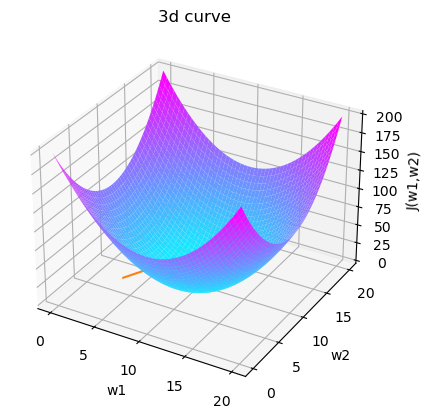

In [253]:
w1 = np.linspace(0, 20)
w2 = np.linspace(0, 20)
w1, w2 = np.meshgrid(w1, w2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w1, w2, J(w1, w2), cmap='cool')
ax.set_title('3d curve')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J(w1,w2)')
ax.plot([3, 5.61], [7, 12.21])
ax.plot(5.61, 12.21, 'o')

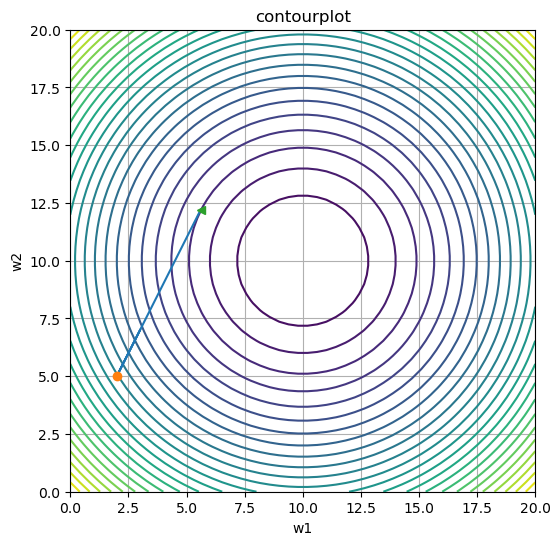

In [254]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.contour(w1, w2, J(w1, w2), levels = 30)
ax.set_title('contourplot')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.grid()
ax.plot([3, 2, 5.61], [7, 5, 12.21])
ax.plot(2, 5, 'o')
ax.plot(5.61, 12.21, '<')

search direction 
grad J = 2(w1-10) i + 2(w2-10) j 
at (2,5)
grad J = -16 i -10 j
vector which we have is passing through these points (3, 7), (2, 5) and it is i + 2 j
so dot product of both vector is coming out to be negative so we can say it search direction is Gradient decent one

(2) Using steepest gradient descent, find the local minimum for the function in the problem 1 (i.e. J(w1, w2) = (w1 - 10 )^2 + (w2 - 10)^2). While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show the minimal point in that direction. 

In [255]:
def gradJ(w1, w2):
    return 2*(w1-10), 2*(w2-10)

def mod(w1, w2):
    return np.sqrt(w1**2 + w2**2)

Text(0.5, 0, 'J(w1,w2)')

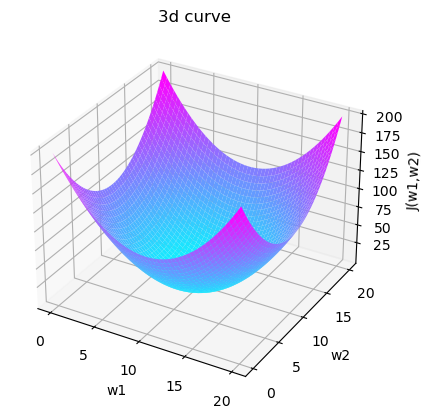

In [262]:
w1 = np.linspace(0, 20)
w2 = np.linspace(0, 20)
w1, w2 = np.meshgrid(w1, w2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w1, w2, J(w1, w2), cmap='cool')
ax.set_title('3d curve')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J(w1,w2)')

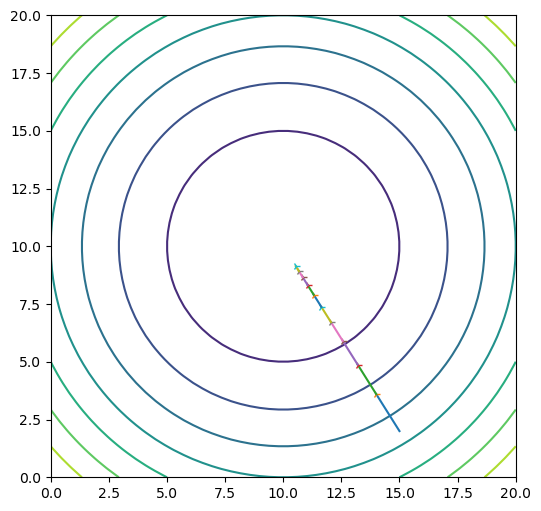

In [257]:
# FIXING THE VALUE OF ALPHA

plt.figure(figsize=(6, 6))
plt.contour(w1, w2, J(w1, w2))

alpha = 0.1
w1, w2 = 15, 2
J_min = J(15, 2)
x, y = gradJ(w1, w2)
ite = 10
while (ite > 0):
    w1_new = w1 - alpha * x
    w2_new = w2 - alpha * y
    temp = J(w1_new, w2_new)
    if temp < J_min :
        plt.plot([w1, w1_new], [w2, w2_new])
        plt.plot(w1_new, w2_new, '4')
        J_min = temp
        w1 = w1_new
        w2 = w2_new
        x, y = gradJ(w1, w2)
        ite -= 1
        
    else:
        break

In [258]:
w1_new, w2_new, x, y, J_min

(10.536870912000001,
 9.141006540800001,
 1.0737418240000025,
 -1.7179869183999976,
 1.0261001391000932)

In [259]:
# lINE SEARCH APPOACH 

alpha = 0
J_min = J(2, 5)
x, y = gradJ(2, 5)

while (alpha < 20):
    w1_new = 2 - alpha * x
    w2_new = 5 - alpha * y
    temp = J(w1_new, w2_new)
    if temp <= J_min :
        J_min = temp
        alpha += 0.01
    else:
        break

In [260]:
w1_new, w2_new, alpha

(10.160000000000004, 10.100000000000001, 0.5100000000000002)

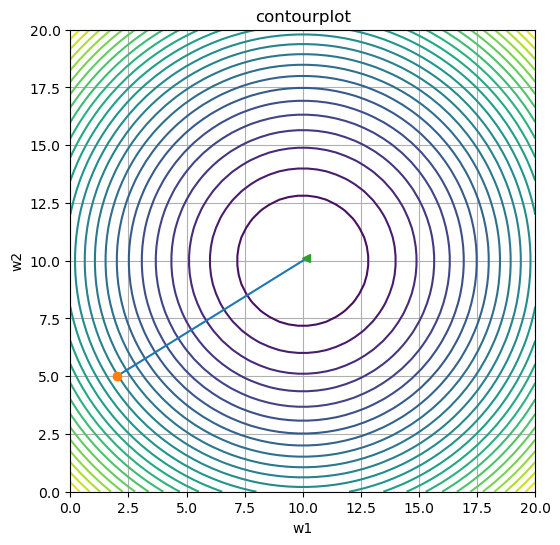

In [263]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.contour(w1, w2, J(w1, w2), levels = 30)
ax.set_title('contourplot')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.grid()
ax.plot([2, w1_new], [5, w2_new])
ax.plot(2, 5, 'o')
ax.plot(w1_new, w2_new, '<')